#Desafio 5: Preparando dataset para modelagem de dados.

Autor: [Gabriel Louzada](https://taggo.one/gabriellouzada)

In [4]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Lendo o dataset
dados = pd.read_csv("../src/data.csv", encoding= 'unicode_escape')
dados.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
# Verificando a descrição dos dados
dados.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Verificando quantidade de dados nulos
dados.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Eliminando registros nulos
dados.dropna(axis=0, subset='CustomerID', inplace=True)

In [9]:
# Eliminando quantidade de produtos e valor unitário menor ou igual a 10
dados.drop(dados.query('UnitPrice <= 0').index, axis=0, inplace=True)
dados.drop(dados.query('Quantity <= 0').index, axis=0, inplace=True)

In [10]:
# Verificando registros duplicados
dados[dados.duplicated(keep=False)].sort_values('Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
483390,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,11/20/2011 12:34,2.55,18110.0,United Kingdom
483414,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,11/20/2011 12:34,2.55,18110.0,United Kingdom
160498,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,4/18/2011 13:17,2.55,18116.0,United Kingdom
160509,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,4/18/2011 13:17,2.55,18116.0,United Kingdom
531669,580958,23345,DOLLY GIRL BEAKER,2,12/6/2011 14:30,1.25,17266.0,United Kingdom
...,...,...,...,...,...,...,...,...
499528,578678,84836,ZINC METAL HEART DECORATION,1,11/24/2011 19:59,1.25,17841.0,United Kingdom
468873,576559,23151,ZINC SWEETHEART SOAP DISH,1,11/15/2011 13:19,2.49,14711.0,United Kingdom
468850,576559,23151,ZINC SWEETHEART SOAP DISH,1,11/15/2011 13:19,2.49,14711.0,United Kingdom
104355,545166,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2/28/2011 14:03,0.85,17027.0,United Kingdom


In [11]:
# Removendo registros duplicados
dados.drop_duplicates(inplace=True)

In [12]:
# Verificando a descrição dos novos dados
dados.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
# Reorganizando o dataframe e verificando informações sobre as colunas
dados.reset_index(inplace=True)
dados.drop('index', axis=1, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.0+ MB


In [14]:
# Alterando o tipo de dados em 'InvoiceDate' e 'CustomerID'
dados = dados.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID': 'int64'})

In [15]:
# Verificando se os tipos foram alterados corretamente
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.0+ MB


In [16]:
# Verificando a tabela após o tratamento inicial
dados

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


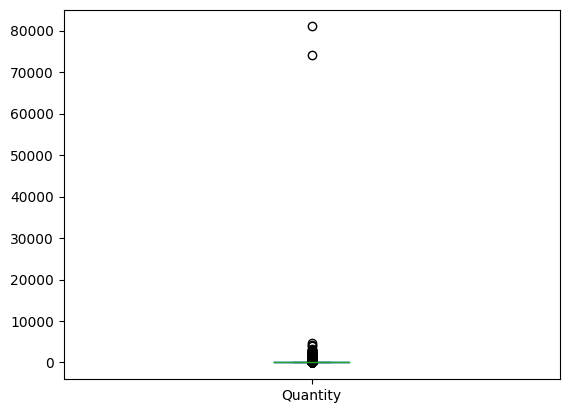

In [17]:
# Verificando distribuição em 'Quantity'
dados['Quantity'].plot.box();

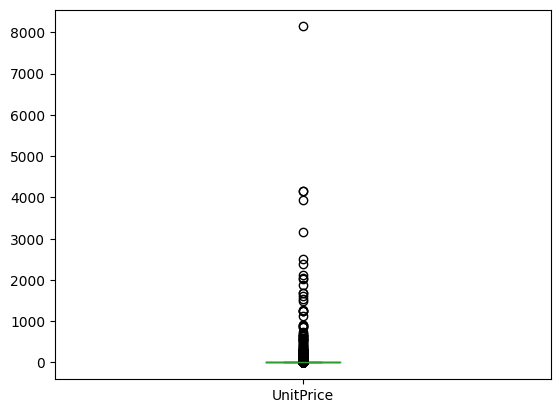

In [18]:
# Verificando distribuição em 'UnitPrice'
dados['UnitPrice'].plot.box();

In [19]:
# Eliminando outliers de 'Quantity' e 'UnitPrice
dados.drop(dados.query('Quantity > 10000').index, axis=0, inplace=True)
dados.drop(dados.query('UnitPrice > 5000').index, axis=0, inplace=True)

In [20]:
# Reorganizando o df
dados.reset_index(inplace=True)
dados.drop('index', axis=1, inplace=True)

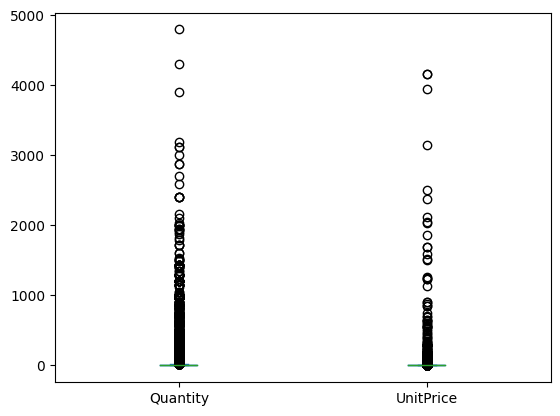

In [21]:
# Plotando a distribuição de 'Quantity' e 'UnitPrice' sem outliers
dados[['Quantity', 'UnitPrice']].plot.box();

In [22]:
# Criando nova feature 'Total' com valores de 'Quantity' e 'UnitPrice'
dados['Total'] = dados['Quantity'] * dados['UnitPrice']

In [25]:
#Verificando a descrição dos dados tratados
dados[['Quantity', 'UnitPrice', 'Total']].describe().style.format('{:.2f}')

,Quantity,UnitPrice,Total
count,392689.00,392689.00,392689.00
mean,12.72,3.11,21.99
std,43.08,18.06,95.90
min,1.00,0.00,0.00
25%,2.00,1.25,4.95
50%,6.00,1.95,12.45
75%,12.00,3.75,19.80
max,4800.00,4161.06,38970.00


In [26]:
# Verificando a nova tabela
dados

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392684,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
392685,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
392686,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
392687,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [27]:
# Retornando a data da última compra
lastdate = dados['InvoiceDate'].max()
lastdate

Timestamp('2011-12-09 12:50:00')

In [28]:
# Agrupando o total vendido por país
agg_count = dados.groupby(['Country'])['Total'].agg('sum').reset_index().sort_values('Total', ascending=False)
agg_count.reset_index(inplace=True)
agg_count.drop('index', axis=1, inplace=True)
agg_count

,Country,Total
0,United Kingdom,7031228.694
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


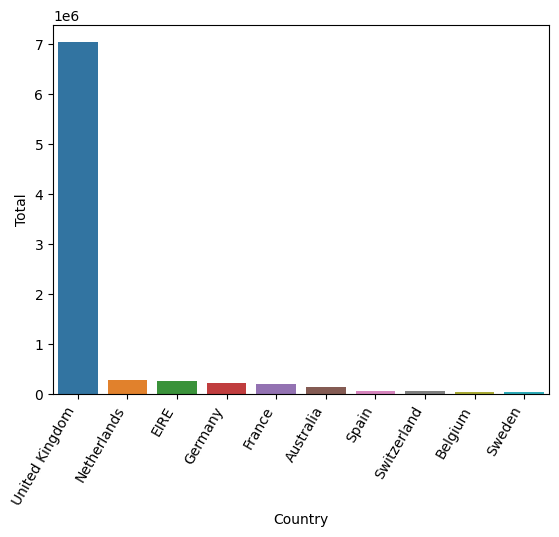

In [29]:
# Retornando o TOP10
top_count = agg_count.loc[agg_count.index <= 9]

# Plotando o gráfico com o TOP10
sns.barplot(data=top_count, x='Country', y='Total')
plt.xticks(rotation=60, ha='right');

In [30]:
# Agrupando a quantidade de produtos vendidos por produto
agg_prod = dados.groupby(['StockCode'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=False)
agg_prod.reset_index(inplace=True)
agg_prod.drop('index', axis=1, inplace=True)
agg_prod

,StockCode,Quantity
0,84077,54319
1,22197,49160
2,85099B,46078
3,85123A,36763
4,84879,35263
...,...,...
3659,23664,1
3660,84550,1
3661,90130A,1
3662,84551,1


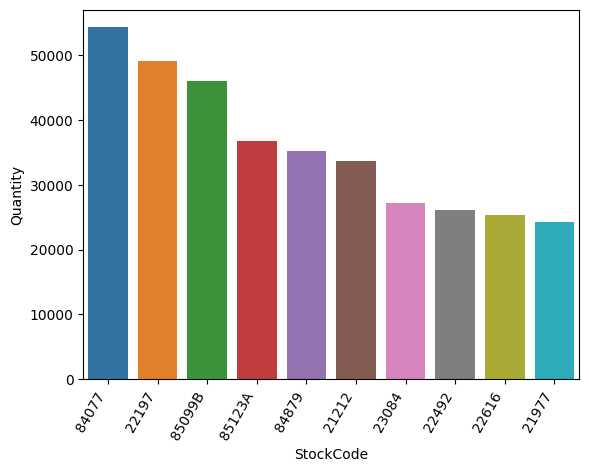

In [31]:
# Retornando o TOP10
top_prod = agg_prod.loc[agg_prod.index <= 9]

#Plotando o TOP10 +Vendidos
sns.barplot(data=top_prod, x='StockCode', y='Quantity')
plt.xticks(rotation=60, ha='right');

In [32]:
# Agrupando a quantidade e o valor total vendido por mês
dados_alt = dados.set_index('InvoiceDate').sort_index()
agg_date = dados_alt[['Quantity', 'Total']].resample('M').sum()
agg_date

,Quantity,Total
InvoiceDate,,
2010-12-31,311048,570422.730
2011-01-31,274258,490917.710
2011-02-28,265027,446084.920
2011-03-31,347582,594081.760
2011-04-30,291366,468374.331
2011-05-31,372863,669212.400
2011-06-30,363014,660046.050
2011-07-31,367360,598962.901
2011-08-31,397373,644051.040


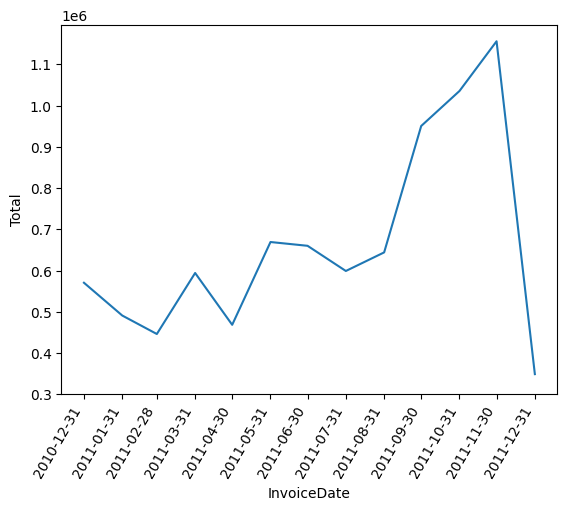

In [33]:
#Plotando o total vendido por mês
sns.lineplot(data=agg_date, x=agg_date.index, y='Total')
plt.xticks(agg_date.index, rotation=60, ha='right')
plt.yticks(np.arange(300000, 1200000, step=100000));

In [34]:
# Filtrando os dados de vendas feitas nos TOP10 países
dados_alt['Period'] = dados_alt.index.strftime('%m/%Y')
dados_alt = dados_alt[dados_alt['Country'].isin(top_count['Country'])]
dados_alt

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Period
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,12/2010
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,12/2010
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,12/2010
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,12/2011
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,12/2011
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,12/2011


In [35]:
# Agregando os dados por País e Mês
agg_mt = dados_alt.groupby(['Country', 'Period'])['Total'].agg('sum')
agg_mt = agg_mt.reset_index()
agg_mt['Period'] = pd.to_datetime(agg_mt['Period'], format='%m/%Y')
agg_mt = agg_mt.sort_values('Period')
agg_mt

,Country,Period,Total
88,Spain,2010-12-01,1843.73
75,Netherlands,2010-12-01,8784.48
23,Belgium,2010-12-01,1809.91
49,France,2010-12-01,9616.31
36,EIRE,2010-12-01,8813.88
...,...,...,...
50,France,2011-12-01,7276.92
37,EIRE,2011-12-01,6978.92
24,Belgium,2011-12-01,1417.73
102,Sweden,2011-12-01,238.00


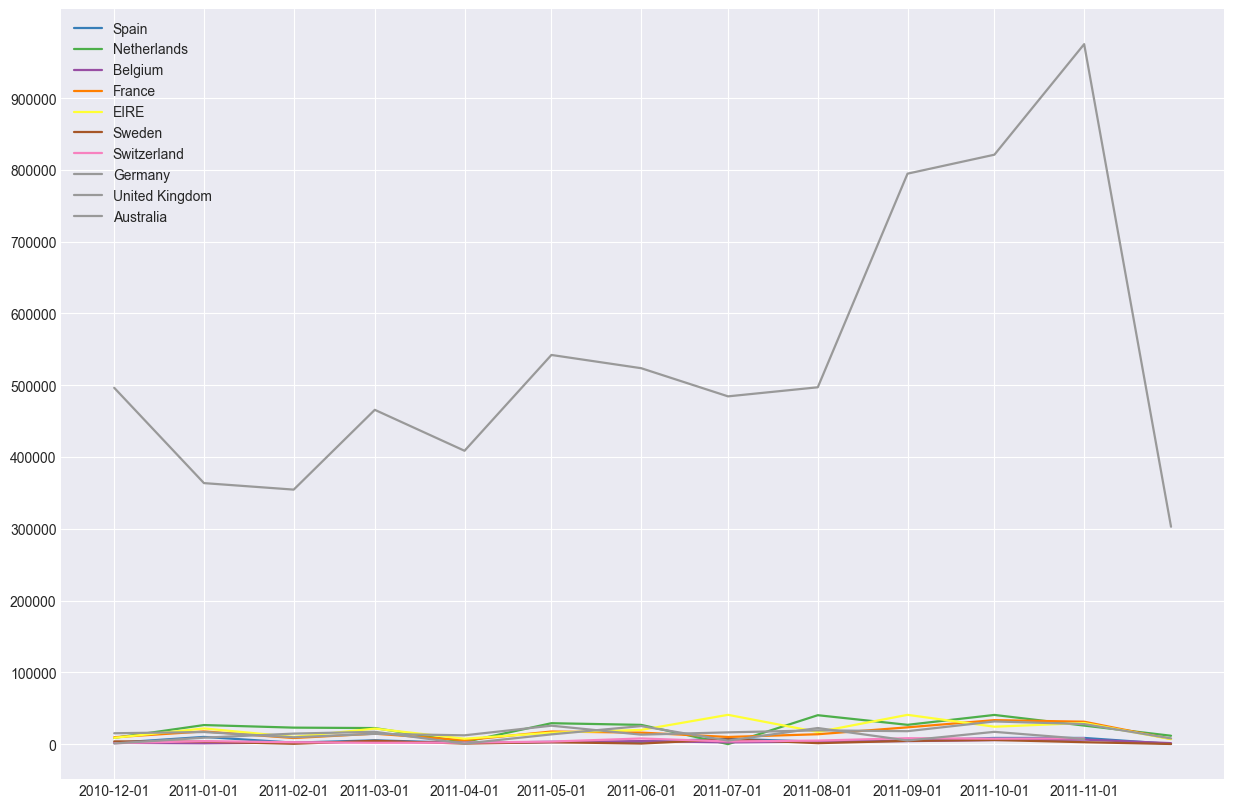

In [36]:
# Plotando um gráfico para cada país com o total vendido por mês
plt.figure(figsize=(15,10))
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set1')
n = 0
for value in agg_mt['Country'].unique():
  n += 1
  country = agg_mt.loc[agg_mt['Country'] == value]
  plt.plot(country['Period'], country['Total'], marker='', color=palette(n), linewidth=1.6, alpha=1, label=value)
  plt.xticks(ticks=country['Period'])
  plt.yticks(ticks=np.arange(0, 1000000, step=100000))
  plt.legend();

In [37]:
# Agrupando dados de quantidade e valor vendido por Cliente, Compra e Data
rfm = dados.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])[['Quantity', 'Total']].agg('sum').reset_index()
rfm = rfm.sort_values('CustomerID')
rfm

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Total
0,12347,537626,2010-12-07 14:57:00,319,711.79
1,12347,542237,2011-01-26 14:30:00,315,475.39
2,12347,549222,2011-04-07 10:43:00,483,636.25
3,12347,556201,2011-06-09 13:01:00,196,382.52
4,12347,562032,2011-08-02 08:48:00,277,584.91
...,...,...,...,...,...
18546,18283,557956,2011-06-23 19:20:00,146,192.80
18555,18283,580872,2011-12-06 12:02:00,142,208.00
18557,18287,570715,2011-10-12 10:23:00,990,1001.32
18556,18287,554065,2011-05-22 10:39:00,488,765.28


In [38]:
# Calculando somente a Recência de cada cliente
r_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'LastPurchase': customer['InvoiceDate'].max()}
    r_only.append(values)

r_only = pd.DataFrame(r_only)
r_only['Recency'] = (lastdate - r_only['LastPurchase']).dt.days
r_only.drop('LastPurchase', axis=1, inplace=True)
r_only

,CustomerID,Recency
0,12347,1
1,12348,74
2,12349,18
3,12350,309
4,12352,35
...,...,...
4332,18280,277
4333,18281,180
4334,18282,7
4335,18283,3


In [39]:
# Calculando somente a Frequência de cada Cliente
f_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Frequency': customer['InvoiceNo'].count()}
    f_only.append(values)

f_only = pd.DataFrame(f_only)
f_only

,CustomerID,Frequency
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,8
...,...,...
4332,18280,1
4333,18281,1
4334,18282,2
4335,18283,16


In [40]:
# Calculando somente o valor médio gasto por cliente
m_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Monetary': customer['Total'].mean()}
    m_only.append(values)

m_only = pd.DataFrame(m_only)
m_only

,CustomerID,Monetary
0,12347,615.714286
1,12348,449.310000
2,12349,1757.550000
3,12350,334.400000
4,12352,313.255000
...,...,...
4332,18280,180.600000
4333,18281,80.820000
4334,18282,89.025000
4335,18283,127.845625


In [41]:
# Criando a tabela final com o RFM completo
final_rfm = r_only.merge(f_only, left_on='CustomerID', right_on='CustomerID')
final_rfm = final_rfm.merge(m_only, left_on='CustomerID', right_on='CustomerID')
final_rfm.head(10).style.format('{:.2f}', subset='Monetary')

,CustomerID,Recency,Frequency,Monetary
0,12347,1,7,615.71
1,12348,74,4,449.31
2,12349,18,1,1757.55
3,12350,309,1,334.40
4,12352,35,8,313.25
5,12353,203,1,89.00
6,12354,231,1,1079.40
7,12355,213,1,459.40
8,12356,22,3,937.14
9,12357,32,1,6207.67
